# 문서 탐색하기
- 개수 세기 (문자, 단어 등)
- 지프의 법칙(Zipf's laws) 확인해보기: fr=k<br>
지프의 법칙(Zipf's law)은 수학적 통계를 바탕으로 밝혀진 경험적 법칙으로, 물리 및 사회 과학 분야에서 연구된 많은 종류의 정보들이 지프 분포에 가까운 경향을 보인다는 것을 뜻한다. 지프 분포는 이산 멱법칙 확률분포와 관계된 확률분포의 하나이다.
- 용례 찾기

In [1]:
from collections import Counter

from konlpy.corpus import kolaw
from konlpy.tag import Hannanum
from konlpy.utils import concordance, pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def draw_zipf(count_list, filename, color='blue', marker='o'):
    sorted_list = sorted(count_list, reverse=True)
    plt.plot(sorted_list, color=color, marker=marker)
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(filename)

In [4]:
doc = kolaw.open('constitution.txt').read()
pos = Hannanum().pos(doc)
cnt = Counter(pos)

In [5]:
print('nchars  :', len(doc))
print('ntokens :', len(doc.split()))
print('nmorphs :', len(set(pos)))
print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(20))
print('\nLocations of "대한민국" in the document:')
concordance(u'대한민국', doc, show=True)

nchars  : 18884
ntokens : 4178
nmorphs : 1499

Top 20 frequent morphemes:
[(('의', 'J'), 396),
 (('.', 'S'), 340),
 (('하', 'X'), 291),
 (('에', 'J'), 283),
 (('ㄴ다', 'E'), 241),
 (('ㄴ', 'E'), 223),
 (('이', 'J'), 221),
 (('을', 'J'), 211),
 (('은', 'J'), 184),
 (('어', 'E'), 176),
 (('를', 'J'), 148),
 (('ㄹ', 'E'), 134),
 (('하', 'P'), 124),
 (('는', 'J'), 117),
 (('법률', 'N'), 115),
 ((',', 'S'), 99),
 (('는', 'E'), 97),
 (('있', 'P'), 96),
 (('되', 'X'), 94),
 (('수', 'N'), 91)]

Locations of "대한민국" in the document:
0	대한민국헌법 유구한 역사와
9	대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에
98	총강 제1조 ① 대한민국은 민주공화국이다. ②대한민국의
100	① 대한민국은 민주공화국이다. ②대한민국의 주권은 국민에게
110	나온다. 제2조 ① 대한민국의 국민이 되는
126	의무를 진다. 제3조 대한민국의 영토는 한반도와
133	부속도서로 한다. 제4조 대한민국은 통일을 지향하며,
147	추진한다. 제5조 ① 대한민국은 국제평화의 유지에
787	군무원이 아닌 국민은 대한민국의 영역안에서는 중대한
1836	파견 또는 외국군대의 대한민국 영역안에서의 주류에
3620	경제 제119조 ① 대한민국의 경제질서는 개인과


[0, 9, 98, 100, 110, 126, 133, 147, 787, 1836, 3620]

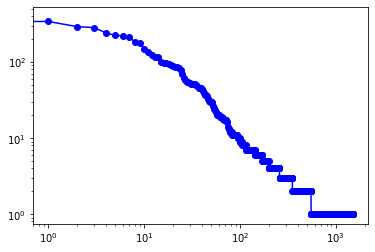

In [6]:
draw_zipf(cnt.values(), 'data/13.zipf.png')